# Construção de um gráfico em papel milimetrado

In [192]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FixedLocator

## Construindo o papel com as dimensões vertical e horizontal em milímetros

In [2]:
v = 190
h = 130

div_v = range(0, v+1, 10)
div_h = range(0, h+1, 10)

Construindo o papel milimetrado

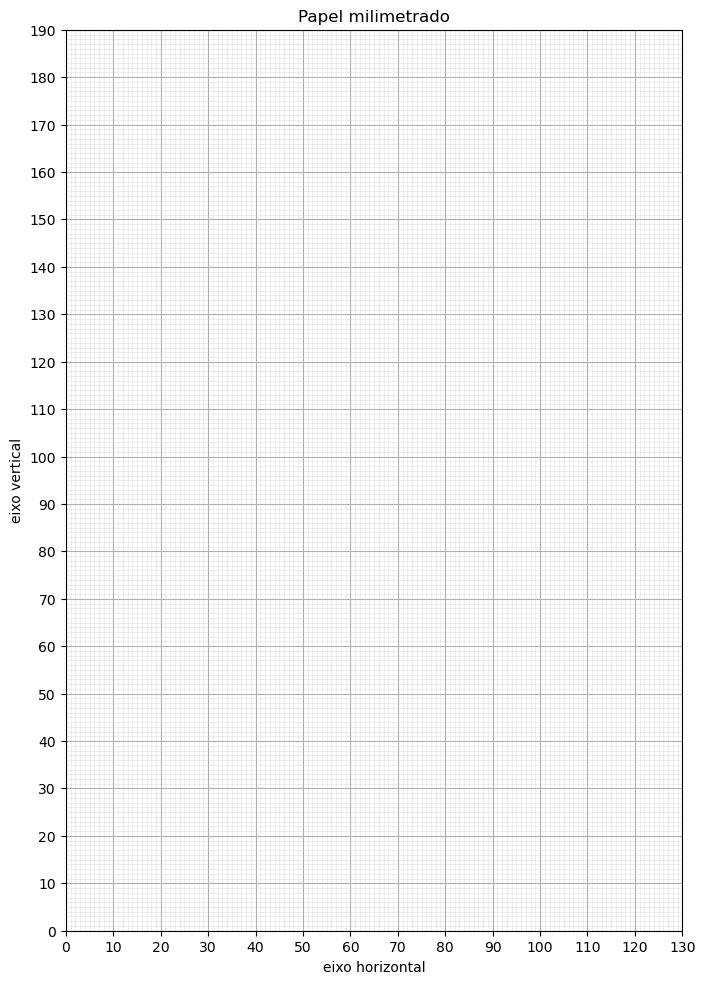

In [3]:
fig, ax = plt.subplots(figsize=(8.3, 11.7))


ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('eixo horizontal')
ax.set_ylabel('eixo vertical')

ax.set_xlim(div_h[0],div_h[-1])
ax.set_ylim(div_v[0],div_v[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_h))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_v))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))


## Criando um conjunto de dados de exemplo

Função para arredondar para 1 algarismo significativo

In [4]:
from math import log10, floor

def round_it(x, sig):
    return round(x, sig - int(floor(log10(abs(x)))) - 1)

In [42]:
x = np.array([1.25, 17.37, 21, 34.50, 48.92])
y = 0.1*x+120
y_err = [round_it(0.01*y[i],1) for i in range(len(y))]
y_err, y-y_err, y+y_err

([1.0, 1.0, 1.0, 1.0, 1.0],
 array([119.125, 120.737, 121.1  , 122.45 , 123.892]),
 array([121.125, 122.737, 123.1  , 124.45 , 125.892]))

## Cálculo da melhor escala

Cálculo da escala natural:

In [168]:
delta_x = x.max()-x.min()
delta_y = (y+y_err).max()-(y-y_err).min()
delta_x, delta_y

(47.67, 6.766999999999996)

In [170]:
escala_natural_x = delta_x/h
escala_natural_y = delta_y/v
escala_natural_x, escala_natural_y

(0.3666923076923077, 0.03561578947368419)

Cálculo da melhor escala: arredondar a escala natural para cima fazendo com que o primeiro algarismo significativo seja 1, 2 ou 5.

In [45]:
from decimal import Decimal

def fexp(number):
    (sign, digits, exponent) = Decimal(number).as_tuple()
    return len(digits) + exponent - 1

def fman(number):
    return float(Decimal(number).scaleb(-fexp(number)).normalize())

def escala_boa(num):
    exp = fexp(num)
    if fman(num) / 5 == 1 or fman(num) / 2 == 1 or fman(num) == 1:
        return num
    if fman(num) / 5 > 1:
        return 10*10**exp
    if fman(num) / 2 > 1:
        return 5*10**exp
    if fman(num) > 1:
        return 2*10**exp
    return 10**exp


In [171]:
escala_x = escala_boa(escala_natural_x)
escala_y = escala_boa(escala_natural_y)
escala_x, escala_y

(0.5, 0.05)

In [172]:
delta_bom_x = h*escala_x
delta_bom_y = v*escala_y
delta_bom_x, delta_bom_y

(65.0, 9.5)

In [173]:
sobra_x = delta_bom_x-delta_x
sobra_y = delta_bom_y-delta_y
sobra_x/2, sobra_y/2

(8.665, 1.366500000000002)

In [174]:
lim_x = [x.min()-sobra_x/2, x.max()+sobra_x/2]
lim_y = [(y-y_err).min()-sobra_y/2, (y+y_err).max()+sobra_y/2]

lim_x, lim_x[1]-lim_x[0], lim_y, lim_y[1]-lim_y[0]

([-7.414999999999999, 57.585], 65.0, [117.7585, 127.2585], 9.5)

In [102]:
# versão anterior
def limite_bom(esc, num):
    if num % fman(esc) == 0:
        #print('A')
        return num
    if fman(esc) % 4 !=0:
        #print('B')
        return round(max (round(num + 1 - (num % 1)) , round(num - (num % 1)) ))
    if fman(esc) % 4 == 0 :
        #print('C')
        return round(max (round(num + 5 - (num % 5)) , round(num - (num % 5)) ))

In [145]:
# versão teste - CORRIGIR PROBLEMAS
def limite_bom(esc, num):
    if num % fman(esc) == 0:
        #print('A')
        return num
    if fman(esc) % 4 !=0:
        #print('B')
        cima = round(num + 1 - (num % 1))
        baixo = round(num - (num % 1))
        if min(abs(cima-num),abs(baixo-num)) == abs(num - cima):
            return cima
        else:
            return baixo
    if fman(esc) % 4 == 0 :
        #print('C')
        cima = round(num + 5 - (num % 5))
        baixo = round(num - (num % 5))
        if min(abs(cima-num),abs(baixo-num)) == abs(num - cima):
            return cima
        else:
            return baixo

In [177]:
limite_bom_x = limite_bom(escala_x, lim_x[1])
limite_bom_y = limite_bom(escala_y, lim_y[1])

escala_x, lim_x[1], limite_bom_x, escala_y, lim_y[1], limite_bom_y


(0.5, 57.585, 58, 0.05, 127.2585, 127)

In [178]:
div_x = [limite_bom_x-escala_x*h+escala_x*10*i for i in range(0,int(h/10+1))]
div_y = [limite_bom_y-escala_y*v+escala_y*10*i for i in range(0,int(v/10+1))]

div_y

[117.5,
 118.0,
 118.5,
 119.0,
 119.5,
 120.0,
 120.5,
 121.0,
 121.5,
 122.0,
 122.5,
 123.0,
 123.5,
 124.0,
 124.5,
 125.0,
 125.5,
 126.0,
 126.5,
 127.0]

Convertendo a escala de x para mm 

In [179]:
x_mm = (x - div_x[0]) / escala_x
y_mm = (y+y_err - div_y[0]) / escala_y

def teste(lista):
    for i in range(len(lista)):
        if lista[i] < 0:
            return 'ERRO'
        else:
            return 'OK'
teste(x_mm), teste(y_mm)

('OK', 'OK')

In [149]:
y

array([120.125, 121.737, 122.1  , 123.45 , 124.892])

<ErrorbarContainer object of 3 artists>

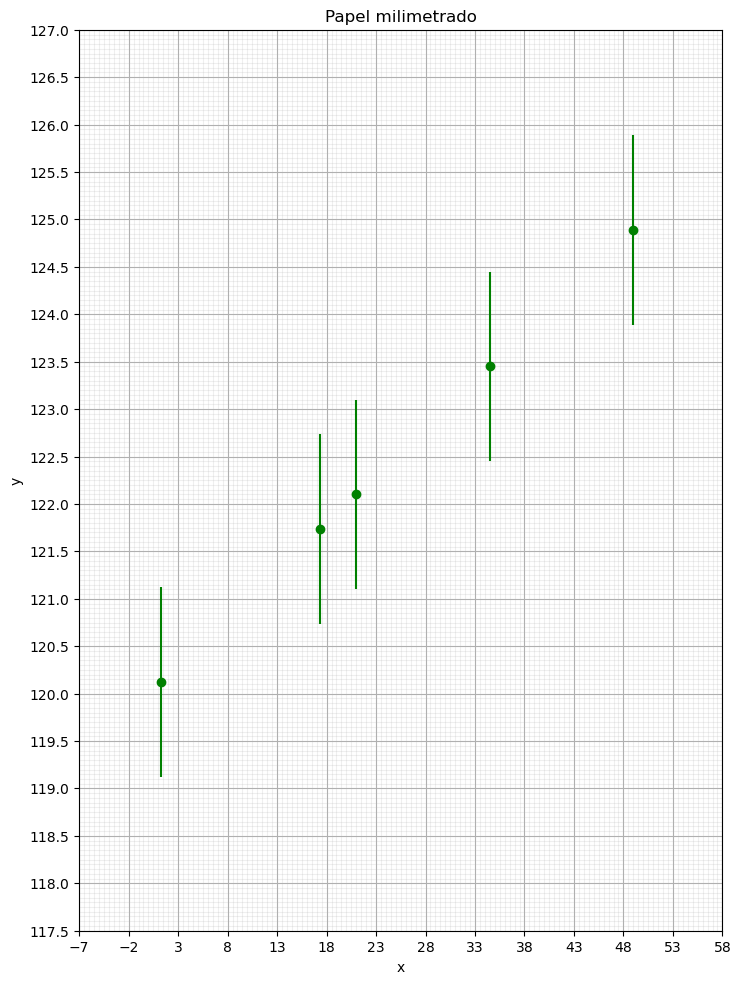

In [166]:
fig, ax = plt.subplots(figsize=(8.3, 11.7))


# ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(div_x[0],div_x[-1])
ax.set_ylim(div_y[0],div_y[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_x))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_y))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# plot
ax.errorbar(
    x,
    y,
    yerr = y_err,
    marker='o',
    linestyle='none',
    color='green',
    label='dados experimentais',
)


In [158]:
x

array([ 1.25, 17.37, 21.  , 34.5 , 48.92])

In [152]:
x_mm

array([ 16.5 ,  48.74,  56.  ,  83.  , 111.84])

In [153]:
y

array([120.125, 121.737, 122.1  , 123.45 , 124.892])

In [154]:
y_mm

array([ 72.5 , 104.74, 112.  , 139.  , 167.84])

### Construção do paralelogramo para gráficos lineares

In [234]:
modelo = LinearRegression().fit(x.reshape(-1, 1), y)
a = modelo.coef_[0]
b = modelo.intercept_
a, b

(0.09999999999999995, 120.0)

In [185]:
# regressão com pesos - não vou usar por enquanto
import statsmodels.formula.api as sm

# put x and y into a pandas DataFrame, and the weights into a Series
ws = pd.DataFrame({'x': x,'y': y})
weights = pd.Series(y_err)

wls_fit = sm.wls('x ~ y', data=ws, weights=1 / weights).fit()

Construção das retas paralelas

In [273]:
b1 = ( (y+y_err).max( )- a*x[list((y+y_err)).index((y+y_err).max( ))] )
y1 = a*x + b1
y1

array([121.125, 122.737, 123.1  , 124.45 , 125.892])

In [274]:
b2 = ( (y-y_err).min( )- a*x[list((y-y_err)).index((y-y_err).min( ))] )
y2 = a*x + b2
y2

array([119.125, 120.737, 121.1  , 122.45 , 123.892])

Cálculos dos coeficientes angulares e lineares máximo e mínimo

In [291]:
a_max = ( (a*x.max() + b1)-(a*x.min() + b2) )/ (x.max()-x.min())
a_min = ( (a*x.max() + b2)-(a*x.min() + b1) )/ (x.max()-x.min())
erro_a = round_it((a_max-a_min)/2,1)
a_max,a_min, erro_a

(0.1419551080344031, 0.05804489196559672, 0.04)

In [293]:
b_max = (a*x.max()+b1) - a*x.max()
b_min = (a*x.max()+b2) - a*x.max()
erro_b = round_it((b_max-b_min)/2,1)
b_max,b_min, erro_b

(121.0, 119.0, 1.0)

In [288]:
y_max = a_max*x+b_min
y_min = a_min*x+b_max
y_max, y_min

(array([119.17744389, 121.46576023, 121.98105727, 123.89745123,
        125.94444389]),
 array([121.07255611, 122.00823977, 122.21894273, 123.00254877,
        123.83955611]))

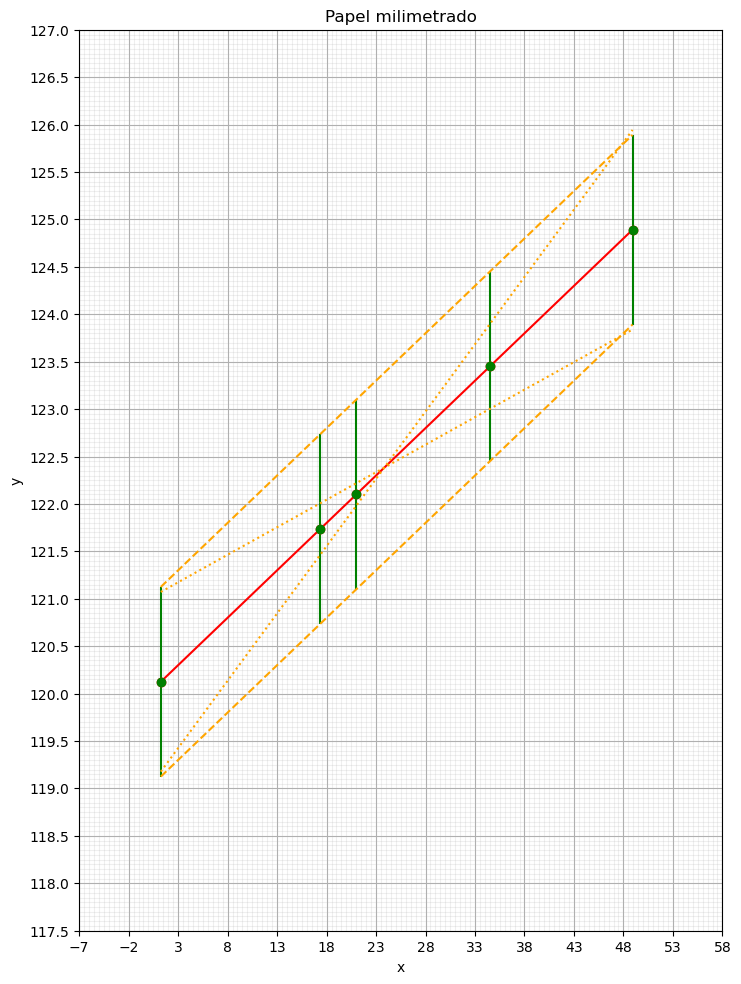

In [289]:
fig, ax = plt.subplots(figsize=(8.3, 11.7))


# ax.set_aspect(1)


ax.set_title('Papel milimetrado')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_xlim(div_x[0],div_x[-1])
ax.set_ylim(div_y[0],div_y[-1])

# grid lines
ax.grid(which = "major")
ax.grid(which = "minor", alpha = 0.2)
ax.set_axisbelow(True)

ax.tick_params(which = "minor", bottom = False, left = False)

#  major grid do eixo horizontal
ax.xaxis.set_major_locator(FixedLocator(div_x))

#  major grid do eixo vertical
ax.yaxis.set_major_locator(FixedLocator(div_y))

# Minor grid dividindo o major grid em 10
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

# plot
# pontos e barras de erro
ax.errorbar(
    x,
    y,
    yerr = y_err,
    marker='o',
    linestyle='none',
    color='green',
    label='dados experimentais',
)
# regressão linear
ax.plot(
    x,
    a*x+b,
    marker='o',
    linestyle='-',
    color='red',
    label='dados experimentais',
)
# paralelogramo
ax.plot(
    x,
    y1,
    linestyle='--',
    color='orange',
    label='dados experimentais',
)
ax.plot(
    x,
    y2,
    linestyle='--',
    color='orange',
    label='dados experimentais',
)
ax.plot(
    x,
    y_max,
    linestyle=':',
    color='orange',
    label='dados experimentais',
)
ax.plot(
    x,
    y_min,
    linestyle=':',
    color='orange',
    label='dados experimentais',
)